## Separa os dados em treino e teste, treina os modelos, faz os testes, verifica os resultados, faz os ajustes necessários e avalia se o modelo pode ser usado como preditor para consumo de cerveja.

In [1]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None) # permite exibição de todas as linhas
pd.set_option('display.max_columns', None) # permite exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe avisos de warning

In [2]:
# le os dados do dataset recebendo em formato de dataframe
dfx = pd.read_csv('arquivos_tratados/df_consumo_cerveja.csv')

In [3]:
# verificando se todos os dados foram carregados
dfx.shape

(365, 7)

In [4]:
# verifica as colunas e linhas carregadas
dfx.head(3)

,Data,temp_media,temp_min,temp_max,precip_mm,fim_semana,cons_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814


In [5]:
# separa as variáveis: dependente_y x independentes_x
# as variáveis independentes (x) são separadas da variável dependente (y) em dataframes diferentes

#X = dfx[['preco_unitario', 'custo', 'imposto','dia_semana', 'feriado', 'tipo_cliente_nro', \
#         'genero_nro', 'linha_produto_nro', 'moeda_nro']]

Xi = dfx[["temp_media", "temp_max", 'fim_semana']]
yi = dfx[['cons_litros']]

In [6]:
# verifica o Dtype das variáveis independentes
print(Xi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_media  365 non-null    float64
 1   temp_max    365 non-null    float64
 2   fim_semana  365 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB
None


In [7]:
# Faz a separação dos dados de treino X_train e y_train (70%) e de teste X_test e y_test (25%)
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.25, train_size=0.70, random_state=2)

In [8]:
# Criando a arquitetura da rede neural:
modelo = Sequential()
modelo.add(Dense(units=3, activation='relu', input_dim=Xi_train.shape[1]))
modelo.add(Dense(units=1, activation='linear'))

In [9]:
# Treinando a rede neural:
modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
resultado = modelo.fit(Xi_train, yi_train, 
                       epochs=200, 
                       batch_size=32,
                       validation_data=(Xi_test, yi_test))

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - loss: 1366.0015 - mae: 36.5279 - val_loss: 1353.3810 - val_mae: 36.4057
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 1299.9819 - mae: 35.6672 - val_loss: 1300.1066 - val_mae: 35.6788
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 1267.5786 - mae: 35.2133 - val_loss: 1248.0192 - val_mae: 34.9534
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1206.3112 - mae: 34.3377 - val_loss: 1197.3242 - val_mae: 34.2325
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1166.1295 - mae: 33.7833 - val_loss: 1147.9574 - val_mae: 33.5156
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1101.2826 - mae: 32.8046 - val_loss: 1100.0658 - val_mae: 32.8052
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1045.0568 - mae: 31.9453 - val_loss: 1053.4528 - val_mae: 32.0985
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 1020.9689 - mae: 31.5370 - val_loss: 1008.0269 - val_mae: 31.3945
Epoch 9

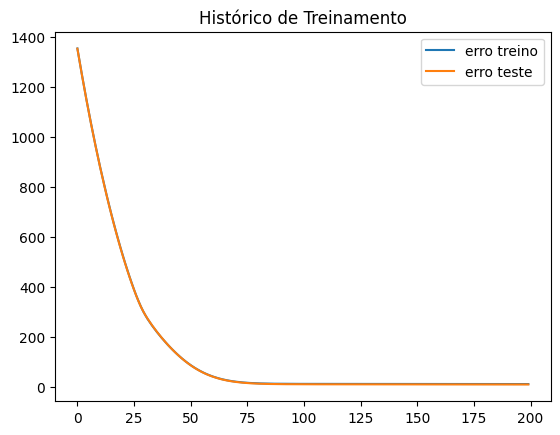

In [21]:
# Plotando gráfico do histórico de treinamento, verificando o erro de treino e de teste
plt.plot(resultado.history["loss"], label="loss")
plt.plot(resultado.history["val_loss"], label="val_loss")
plt.title('Histórico de Treinamento')
plt.legend(['erro treino', 'erro teste'])
plt.show()

In [15]:
# salva o modelo de árvore de decisão (faz o deploy)
# o modelo treinado e aprovado, agora é salvo em um arquivo pkl para ser utilizado em futuras aplicações
joblib.dump(modelo, "modelos/consumo_cerveja_keras_model.pkl")

['modelos/consumo_cerveja_keras_model.pkl']